In [4]:

from sklearn.datasets import load_iris

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np


In [5]:
iris = load_iris()

X = iris.data

# y is coded Species of iris
y = iris.target

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
df = pd.DataFrame(X,columns=iris.feature_names)
df['Label']=y
df['Species']=df['Label'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
#Transform features
pca = PCA()
X_pca = pca.fit_transform(X)

#Merge with df
pca_df = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4'])
df = pd.merge(df, pca_df, right_index=True, left_index=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Label,Species,PC1,PC2,PC3,PC4
0,5.1,3.5,1.4,0.2,0,setosa,-2.684126,0.319397,-0.027915,-0.002262
1,4.9,3.0,1.4,0.2,0,setosa,-2.714142,-0.177001,-0.210464,-0.099027
2,4.7,3.2,1.3,0.2,0,setosa,-2.888991,-0.144949,0.017900,-0.019968
3,4.6,3.1,1.5,0.2,0,setosa,-2.745343,-0.318299,0.031559,0.075576
4,5.0,3.6,1.4,0.2,0,setosa,-2.728717,0.326755,0.090079,0.061259


In [8]:
print('Explained Variance Ratio')
for i in range(4):
    print('PC{}: {}'.format(i+1,pca.explained_variance_ratio_[i]))

Explained Variance Ratio
PC1: 0.924618723201727
PC2: 0.05306648311706785
PC3: 0.017102609807929738
PC4: 0.0052121838732753665


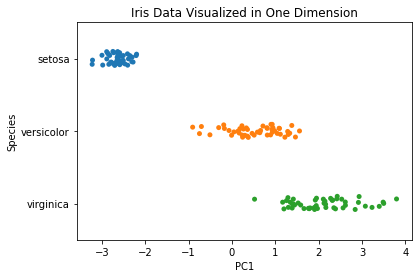

In [14]:
sns.stripplot(x="PC1", y="Species", data=df)
plt.title('Iris Data Visualized in One Dimension');

In [15]:
precent_of_variance_explained = .95

pca = PCA(n_components=precent_of_variance_explained)

pca_data = pca.fit_transform(X)

print("{} Principal Components are required to explain {} of the variation in this data.".format(pca.n_components_,precent_of_variance_explained))

2 Principal Components are required to explain 0.95 of the variation in this data.


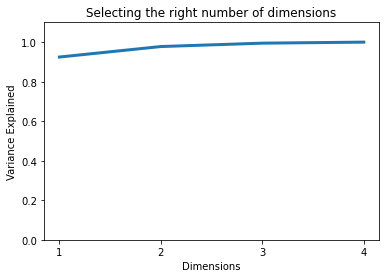

In [16]:
pca = PCA()
pca.fit(X)

cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.arange(len(cumsum))+1

plt.plot(dim,cumsum,'-',lw=3);

plt.xlabel('Dimensions')
plt.ylabel('Variance Explained')
plt.title('Selecting the right number of dimensions')

plt.xticks([1,2,3,4])
plt.ylim([0,1.1]);

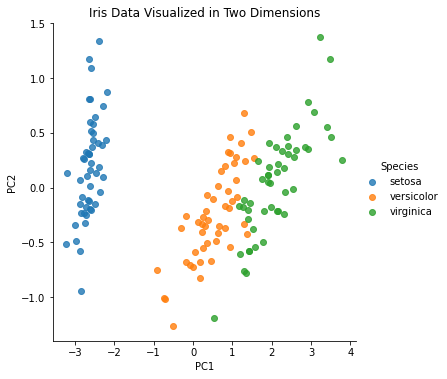

In [19]:
sns.lmplot(x ='PC1', y = 'PC2',data=df,hue='Species',fit_reg=False)
plt.title('Iris Data Visualized in Two Dimensions');